# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Frank Code Ambiguity Function
***

Referring to Section 8.7.2,  Frank codes are polyphase codes representing a quadratic phase shift in a discrete manner.  To generate a Frank code, a single pulse is divided into $N$ groups.  Next, each group is divided into $N$ subpulses.  Therefore, the length of Frank codes are perfect squares, $L = N^2$.  Frank codes may be represented as a matrix of the form (Equation 8.72)

\begin{equation}
F_N = \frac{2\pi}{N}
\begin{bmatrix}
    0 & 0 & 0 & \dots  & 0 \\
    0 & 1 & 2 & \dots  & N-1 \\
    0 & 2 & 4 & \dots  & 2(N-1) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & N-1 & 2(N-1) & \dots  & (N-1)^2
\end{bmatrix}\hspace{0.5in} \text{(rad)},
\end{equation}

where each row is the phase shift associated with the subpulses in that group.  Frank codes may also be expressed more compactly as (Equation 8.73)

\begin{equation}
    F_N = \frac{2\pi}{N}(m - 1)(n - 1) \hspace{0.2in} \text{for} \hspace{0.2in} m,n = 1 \dots N \hspace{0.5in} \text{(rad)}.
\end{equation}

For example, the Frank code for $N=3$ is (Equation 8.74)

\begin{equation}
    F_3 = \frac{2\pi}{3}[\;0\;\; 0\;\;  0\;\; 0\;\; 1\;\; 2\;\; 0\;\; 2\;\; 4\;] = \left[\;0\;\; 0\;\;  0\;\; 0\;\; \frac{2\pi}{3}\;\; \frac{4\pi}{3}\;\; 0\;\; \frac{4\pi}{3}\;\; \frac{2\pi}{3}\;\right].
\end{equation}

For phase shifts larger than $2\pi$, the phase wraps and the modulo with $2\pi$ is used.  The phase shift associated with each subpulse for Frank code $F_3$ is illustrated in Figure 8.21.

The ambiguity function of Frank code waveforms is similar to that of LFM waveforms.  This is expected as the Frank code is a discrete version of a quadratic phase shift.  For very long Frank codes, the phase shift between subpulses becomes small.  This can be problematic as phase instability of the system degrades the phase shift associated with each subpulse and reduces the performance of the waveform.  Other discrete polyphase waveforms have been developed to approximate quadratic phase shifts.
***

Begin by getting the library path

In [1]:
import lib_path

Set the N-phase code and the chip width (s)

In [2]:
n_phase = 3

chip_width = 0.1

Generate the N-phase Frank code

In [3]:
from Libs.ambiguity.frank_code import n_phase_code

code = n_phase_code(n_phase)

Calculate the ambiguity function for the Frank coded waveform

In [4]:
from Libs.ambiguity.ambiguity_function import phase_coded_wf

ambiguity, time_delay, doppler_frequency = phase_coded_wf(code, chip_width)

Display the zero-Doppler cut, the zero-range cut, and the 2D contour plot using the `matplotlib` routines

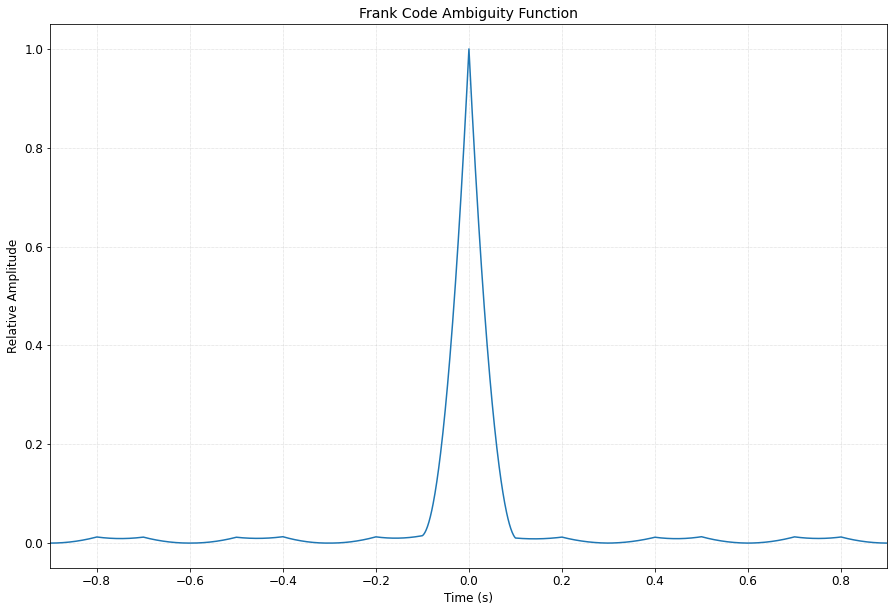

In [5]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Plot the ambiguity function

plt.plot(time_delay, ambiguity[round(len(doppler_frequency) / 2)], '')



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title and labels

plt.title('Frank Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Create the zero-range cut

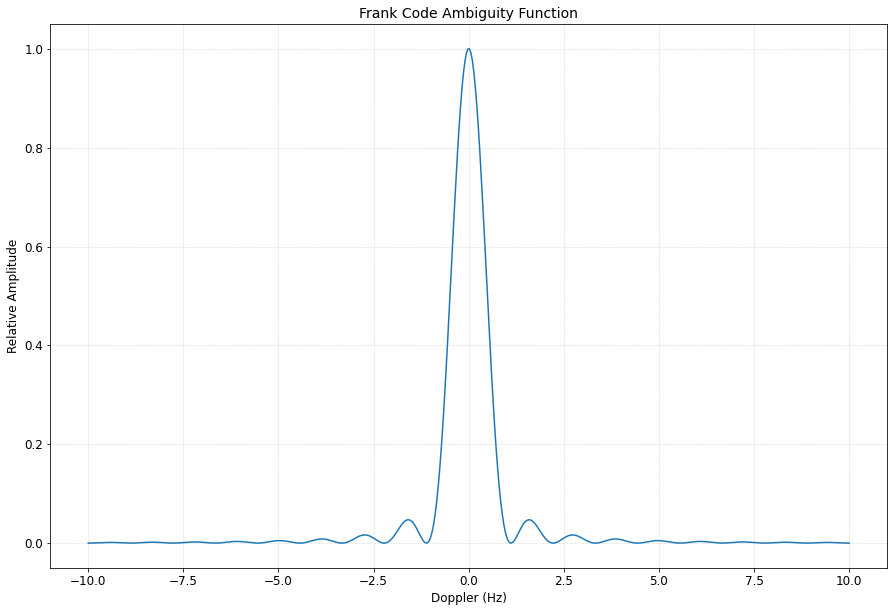

In [6]:
 # Plot the ambiguity function

plt.plot(doppler_frequency,  ambiguity[:, round(len(time_delay) / 2)], '')



# Set the x and y axis labels

plt.xlabel("Doppler (Hz)", size=12)

plt.ylabel("Relative Amplitude", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the plot title and labels

plt.title('Frank Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)

Create the two-dimensional contour plot

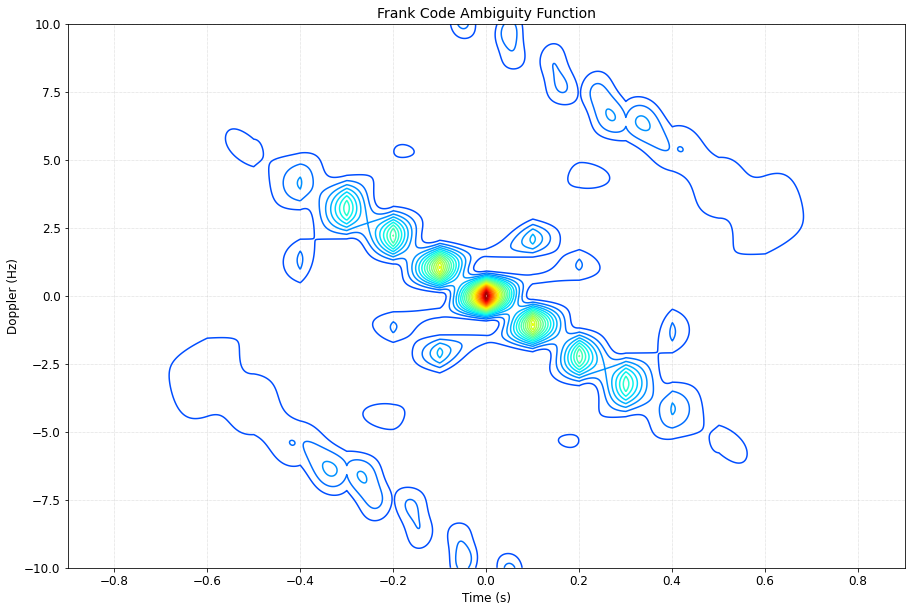

In [7]:
from numpy import meshgrid


# Create the grid

t, f = meshgrid(time_delay, doppler_frequency)



# Plot the ambiguity function

plt.contour(t, f, ambiguity, 30, cmap='jet', vmin=-0.2, vmax=1.0)



# Set the time axis limits

plt.xlim(-len(code) * chip_width, len(code) * chip_width)



# Set the x and y axis labels

plt.xlabel("Time (s)", size=12)

plt.ylabel("Doppler (Hz)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('Frank Code Ambiguity Function', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)